In [2]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

In [ ]:
# opening the dataset
f = open('./dataset_OSAS.pickle', 'rb')
data = pickle.load(f)
f.close()

In [ ]:
# finding confidence intervals of APNEA events

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

intervals = {}

for pt in patients:
    patient = data[data['patient'] == pt]
    event = patient['event']
    intervals[pt] = []
    pos = -1
    for i in event.index:
        if event[i] != 'NONE':
            if pos == -1:
                pos = i 
        else: 
            if pos != -1:
                intervals[pt] = np.append(intervals[pt], i-pos)
            pos = -1
            

In [ ]:
import numpy as np, scipy.stats as st

conf_intervals = {}

for pt in patients:
    conf_intervals[pt] = st.t.interval(0.95, len(intervals[pt])-1, loc=np.mean(intervals[pt]), scale=st.sem(intervals[pt]))
    

In [ ]:
intervals

In [3]:
# 18 second windows 
# dataset_OSAS-window-18.pkl
f = open('./dataset_OSAS-window-18.pkl', 'rb')
data_18 = pickle.load(f)
f.close()

In [4]:
data_18 = data_18.dropna(subset=['event','signal_ecg_i','signal_ecg_ii','signal_ecg_iii'])

In [5]:
# logistic regression on ecg_signal_i waveform data
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_i']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, ecg[i])
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, np.zeros(arrlen))
            else:
                label_arr = np.append(label_arr, np.ones(arrlen))
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.56      0.59      0.58   1262351
       APNEA       0.57      0.54      0.55   1260273

    accuracy                           0.56   2522624
   macro avg       0.57      0.56      0.56   2522624
weighted avg       0.57      0.56      0.56   2522624



In [6]:
# logistic regression on ecg_signal_ii waveform data
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_ii']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, ecg[i])
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, np.zeros(arrlen))
            else:
                label_arr = np.append(label_arr, np.ones(arrlen))
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.50      0.48      0.49   1259758
       APNEA       0.50      0.51      0.50   1257714

    accuracy                           0.50   2517472
   macro avg       0.50      0.50      0.50   2517472
weighted avg       0.50      0.50      0.50   2517472



In [7]:
# logistic regression on ecg_signal_iii waveform data
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_iii']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, ecg[i])
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, np.zeros(arrlen))
            else:
                label_arr = np.append(label_arr, np.ones(arrlen))
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.55      0.55      0.55   1221061
       APNEA       0.55      0.55      0.55   1220859

    accuracy                           0.55   2441920
   macro avg       0.55      0.55      0.55   2441920
weighted avg       0.55      0.55      0.55   2441920



In [8]:
# logistic regression on ecg_signal_i standard deviation
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_i']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, np.std(ecg[i]))
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, 0)
            else:
                label_arr = np.append(label_arr, 1)
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.57      0.70      0.62     15692
       APNEA       0.61      0.47      0.53     15841

    accuracy                           0.58     31533
   macro avg       0.59      0.58      0.58     31533
weighted avg       0.59      0.58      0.58     31533



In [10]:
# logistic regression on ecg_signal_ii standard deviation
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_ii']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, np.std(ecg[i]))
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, 0)
            else:
                label_arr = np.append(label_arr, 1)
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.52      0.64      0.58     15605
       APNEA       0.54      0.42      0.48     15864

    accuracy                           0.53     31469
   macro avg       0.53      0.53      0.53     31469
weighted avg       0.53      0.53      0.52     31469



In [9]:
# logistic regression on ecg_signal_iii standard deviation
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_iii']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, np.std(ecg[i]))
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, 0)
            else:
                label_arr = np.append(label_arr, 1)
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.59      0.46      0.51     15066
       APNEA       0.57      0.69      0.62     15458

    accuracy                           0.57     30524
   macro avg       0.58      0.57      0.57     30524
weighted avg       0.58      0.57      0.57     30524



Text(0.5, 0, 'Standard Deviation of ecg_signal_iii')

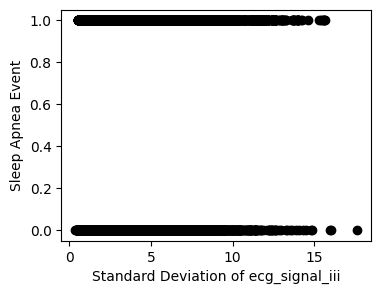

In [25]:
# # Fit the classifier
# clf = LogisticRegression(C=1e5)
# clf.fit(x, y)
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from scipy.special import expit

# # and plot the result
# plt.figure(1, figsize=(4, 3))
# plt.clf()
# plt.scatter(x.ravel(), y, color="black", zorder=20)

# X_test = np.linspace(-5, 10, 300)
# plt.ylabel("Sleep Apnea Event")
# plt.xlabel("Standard Deviation of ecg_signal_iii")

In [26]:
# logistic regression on ecg_signal_i average
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_i']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, np.average(ecg[i]))
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, 0)
            else:
                label_arr = np.append(label_arr, 1)
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.56      0.64      0.60     15692
       APNEA       0.59      0.51      0.55     15841

    accuracy                           0.57     31533
   macro avg       0.57      0.57      0.57     31533
weighted avg       0.57      0.57      0.57     31533



In [27]:
# logistic regression on ecg_signal_ii average
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_ii']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, np.average(ecg[i]))
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, 0)
            else:
                label_arr = np.append(label_arr, 1)
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.50      1.00      0.66     15605
       APNEA       0.00      0.00      0.00     15864

    accuracy                           0.50     31469
   macro avg       0.25      0.50      0.33     31469
weighted avg       0.25      0.50      0.33     31469



/Users/piperfrances/miniconda3/envs/ds4h/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piperfrances/miniconda3/envs/ds4h/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piperfrances/miniconda3/envs/ds4h/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [28]:
# logistic regression on ecg_signal_iii average
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

patients = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '19', '20', '21', '22', '23', '24', '25', '26', '3', '27', '28',
       '29', '30', '4', '5', '6', '7', '8', '9']

x = []
y = []

for pt in patients:

    patient = data_18[data_18['patient'] == pt]
    ecg = patient['signal_ecg_iii']
    event = patient['event']
    e_arr = []
    label_arr = []
    for i in ecg.index:
        arrlen = len(ecg[i])
        if np.isnan(ecg[i]).any():
            pass
        else:
            e_arr = np.append(e_arr, np.average(ecg[i]))
            if event[i] == 'NONE':
                label_arr = np.append(label_arr, 0)
            else:
                label_arr = np.append(label_arr, 1)
    x = np.append(x, e_arr)
    y = np.append(y, label_arr)

oversample = SMOTE()
x= x.reshape(-1, 1)
y = y.reshape(-1, 1)
x, y = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)

logModel = LogisticRegression()
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)
mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'])
print(report)

              precision    recall  f1-score   support

        None       0.55      0.61      0.58     15066
       APNEA       0.58      0.52      0.55     15458

    accuracy                           0.56     30524
   macro avg       0.57      0.57      0.56     30524
weighted avg       0.57      0.56      0.56     30524

